# Titanic Data Analysis

## Introduction

**Purpose**: To determine which factors increased the survival of the Titanic passengers according to data analysis.

This dataset contains demographics and passenger information from 891 of the 2'224 passengers and crew on board the Titanic. A description of this dataset can be viewed on [the Kaggle website](https://www.kaggle.com/c/titanic/data).

### Questions

[The Kaggle website](https://www.kaggle.com/c/titanic) mentioned the following: "One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class."

What factors made people more likely to survive?

1. Which class had higher chances survive according to gender? 
2. Did women and children were prioritized over men? Was the chance of survival higher as a women or child?
3. Did age, regardless of sex, was a determinant factor of survival?



## Data Wrangling

### Data Dictionary  
from [the Kaggle website](https://www.kaggle.com/c/titanic)

* **survival**: Survival (0 = No; 1 = Yes)
* **pclass**: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* **name**: Name
* **sex**: Sex
* **age**: Age
* **sibsp**: Number of Siblings/Spouses Aboard
* **parch**: Number of Parents/Children Aboard
* **ticket**: Ticket Number
* **fare**: Passenger Fare
* **cabin**: Cabin
* **embarked**: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

**Additional information**:
* Pclass is a proxy for socio-economic status (SES) 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

* Age is in Years; Fractional if Age less than One (1) If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch) some relations were ignored. The following are the definitions used for sibsp and parch:

* **Sibling**: Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
* **Spouse**: Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
* **Parent**: Mother or Father of Passenger Aboard Titanic
* **Child**: Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic. (Some children travelled only with a nanny, therefore parch=0 for them).


## Data Exploration

In [14]:
# At first, all the necessary libaries have been imported and will be used for later steps.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pdb
%matplotlib inline
sns.set(style="whitegrid")

# Then, a part of the data file has been loaded to showcase the kind of data it includes
titanic_all = pd.read_csv('Desktop/titanic-data.csv')
titanic_all.head().round(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


In [15]:
# The next step is to review if the numerical data is complete
titanic_all.describe().round(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


The table above shows that the sample is composed of 891 passengers and 38% of them survived. The mean of the age of passengers is 29.7 years old.

Moreover, the count of each column is 891, except for ''Age'' that has only 714 data. It means that the age of 177 passengers is unknown. Therefore, the ''Age'' category has to be cleaned to be analysed. 177 missing values corresponds to about 20% of the 891 sample dataset.
Another relevant fact is that children are not differentiated from adults in the list. After the cleanup of the age row, children will be defined as passengers under 16 years old.

## Data Clean-up

Not all the data from the data file are necessary, such as the names, ticket, fare, parch, SibSp, cabin, embarked and passengerld. Therefore, these columns will be removed to consider only the relevant data.

In [16]:
titanic_all_cleaned = titanic_all.drop(['PassengerId','Name','Ticket','Cabin','Fare','Parch','SibSp','Embarked'], axis=1)
titanic_all_cleaned.head()

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


On top of that, missing values should be fixed to avoid any bias in the data analysis. For instance, the third question: "Did age, regardless of sex, was a determinant factor of survival?", is concerned with this issue. Graphs will not be affected since the data concerning age will be cleaned and rows without values will not be taken into consideration.

In [17]:
# To determine the number of males and females with a missing age value

Missing_age = pd.isnull(titanic_all_cleaned['Age'])

Missing_age_woman = titanic_all_cleaned[Missing_age]['Sex'] == 'female'
Missing_age_men = titanic_all_cleaned[Missing_age]['Sex'] == 'male'

print 'The number of missing age value for women is {}.'.format(Missing_age_woman.sum())
print 'The number of missing age value for men is {}.'.format(Missing_age_men.sum())


The number of missing age value for women is 53.
The number of missing age value for men is 124.


In [21]:
NAN = titanic_all['Age'].mean
    
titanic_all_age_cleaneds = titanic_all['Age'].fillna(titanic_all['Age'].mean())

In [22]:
titanic_all_age_cleaned = titanic_all_cleaned.dropna()
titanic_all_age_cleaned.describe().round(2)

,Survived,Pclass,Age
count,714.00,714.00,714.00
mean,0.41,2.24,29.70
std,0.49,0.84,14.53
min,0.00,1.00,0.42
25%,0.00,1.00,20.12
50%,0.00,2.00,28.00
75%,1.00,3.00,38.00
max,1.00,3.00,80.00


The table above shows the data without the age missing value.

# Data analysis

### 1. Which class had higher chances survive according to gender?

In [23]:
# To analyse survival according to class and gender
def survival_rate(pclass, sex):
    group_total = titanic_all_cleaned.groupby(['Pclass', 'Sex']).size()[pclass,sex].astype('float')
    group_gender_survived = titanic_all_cleaned.groupby(['Pclass','Survived','Sex']).size()[pclass,1,sex].astype('float')
    survived_gender = (group_gender_survived / group_total * 100).round(2)
    
    return survived_gender

# To group passengers by class, suvival and gender
group_class_survived_size = titanic_all_cleaned.groupby(['Pclass','Survived','Sex']).size()

# To showcase how many passengers survived / did not survive per class and gender

print 'Upper Class - female survival rate: {}%'.format(survival_rate(1,'female'))
print 'Upper Class - male survival rate: {}%'.format(survival_rate(1,'male'))
print '-----'
print 'Middle Class - female survival rate: {}%'.format(survival_rate(2,'female'))
print 'Middle Class - male survival rate: {}%'.format(survival_rate(2,'male'))
print '-----'
print 'Lower Class - female survival rate: {}%'.format(survival_rate(3,'female'))
print 'Lower Class - male survival rate: {}%'.format(survival_rate(3,'male'))

Upper Class - female survival rate: 96.81%
Upper Class - male survival rate: 36.89%
-----
Middle Class - female survival rate: 92.11%
Middle Class - male survival rate: 15.74%
-----
Lower Class - female survival rate: 50.0%
Lower Class - male survival rate: 13.54%


According to the result, both men and women had the highest survival chances if they were from the upper class, then from the middle class and finally from the lower class. 

Concerning women, There is only 4.7% difference of survival rate for women from the upper class and middle class, then, their survival rate drops by 42.11% for the lower class.
As for men, their survival rate starts from 36.89% if they came from the upper class, then diminishes to 15.74% if they were in the middle class and fell to 13.54% if they were in the lower class.

The average survival rate of men and women are the following:
* Upper Class: 66.85%
* Middle Class: 53.92%
* Lower Class: 31.77%

### Visualization of the data

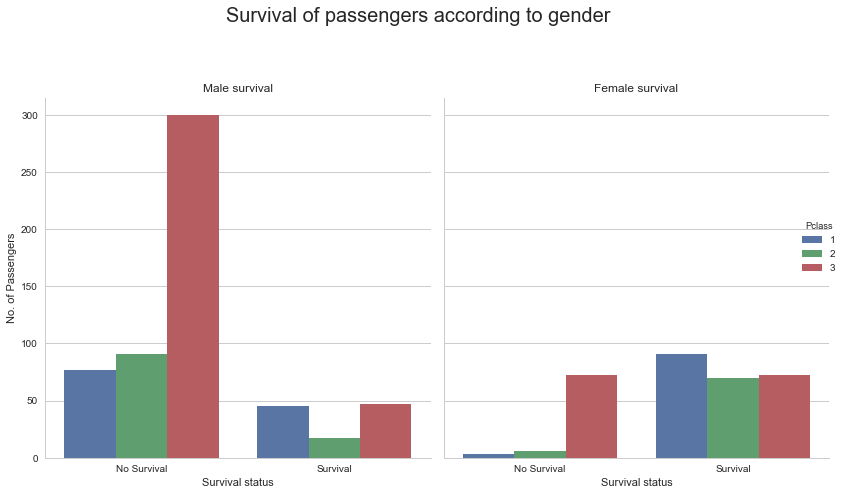

In [99]:
graph = sns.factorplot('Survived', col='Sex', hue='Pclass', data=titanic_all_cleaned, kind='count', size=7, aspect=.8)

(graph.set_axis_labels('Survival status', 'No. of Passengers').set_xticklabels(["No Survival", "Survival"]).set_titles('{col_name}'))
titles = ['Male survival', 'Female survival']
for ax, title in zip(graph.axes.flat, titles): ax.set_title(title)
    
plt.suptitle('Survival of passengers according to gender', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.8)

Acccording to the graphs above, men from the lower class had the least chances to survive. Controversely, women from the upper class had the most chances to survive.
	

### 2. Were women and children prioritized over men? Was the chance of survival higher as a women or child?

In [101]:
# Creation of a new cateogry column and categorize passengers as Women, Men, or Children
titanic_all_age_cleaned.loc[((titanic_all_age_cleaned['Sex'] == 'female') &(titanic_all_age_cleaned['Age'] >= 16)), 'Category'] = 'Women' 

titanic_all_age_cleaned.loc[((titanic_all_age_cleaned['Sex'] == 'male') &(titanic_all_age_cleaned['Age'] >= 16)), 'Category'] = 'Men'

titanic_all_age_cleaned.loc[(titanic_all_age_cleaned['Age'] < 16), 'Category'] = 'Children'

print (titanic_all_age_cleaned.groupby(['Category','Survived']).size())

Category  Survived
Children  0            34
          1            49
Men       0           341
          1            72
Women     0            49
          1           169
dtype: int64


### Visualization of the data

The number of children on board were 83
The number of adult females on board were 218
The number of adult males on board were 413
The amount of passengers without an unknown age is 177


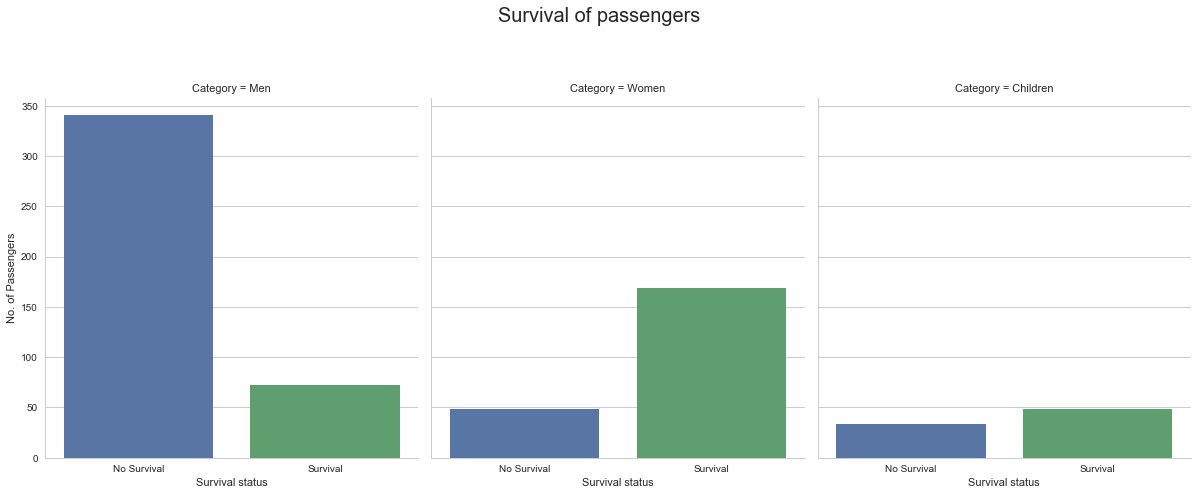

In [100]:
# A graph to clearly visualize the data
graph = sns.factorplot('Survived', col='Category', data=titanic_all_age_cleaned, kind='count', size=7, aspect=.8)

(graph.set_axis_labels('Survival status', 'No. of Passengers').set_xticklabels(['No Survival', 'Survival']))

plt.suptitle('Survival of passengers', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.8)

# The amount of passengers on board, whether they were a woman, man or child    
Child = titanic_all_age_cleaned.loc[(titanic_all_age_cleaned['Age'] < 16), 'Category']
print "The number of children on board were %s" % Child.count()
Women = titanic_all_age_cleaned.loc[((titanic_all_age_cleaned['Sex'] == 'female') &(titanic_all_age_cleaned['Age'] >= 16)), 'Category']
print "The number of adult females on board were %s" % Women.count()
Men = titanic_all_age_cleaned.loc[((titanic_all_age_cleaned['Sex'] == 'male') &(titanic_all_age_cleaned['Age'] >= 16)), 'Category']
print "The number of adult males on board were %s" % Men.count()

Missing_age = len(pd.isnull(titanic_all_cleaned['Age']))
Total = Missing_age - len(Child + Women + Men)
print "The amount of passengers without an unknown age is %s" %Total

The graphs above show that adult males is the category that died the most, then adult females and finally children. However, these data cannot be compared,as the number of adult males, adult females and children varies. There were 413 adult males, 218 adult females and only 83 females on board (with 177 unknown age missing values). Therefore, since the number of adult males is about twice bigger than adult females, it is logical that there was a higher number of death for adult males than the other categories.

However, these data confirm the policy of the Titanic, which was "ladies and children first", which explains why 341 over 413 men died, 49 over 218 women died and 34 over 83 children died. Therefore, 82.57% of men, 22.48% of women and 40.96% of children died.


These figures clearly show that women and children were prioritized.

### 3. Did age, regardless of sex, was a determinant factor of survival?

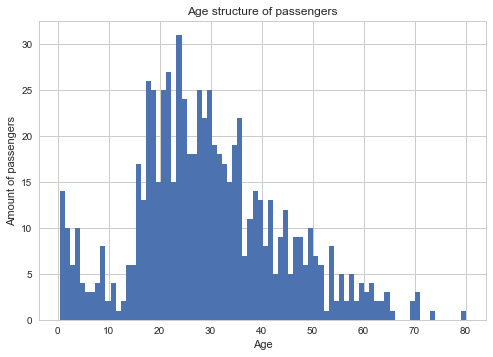

In [97]:
titanic_all['Age'].hist(bins=80)
plt.title("Age structure of passengers")
plt.ylabel("Amount of passengers")
plt.xlabel("Age")

The graph above shows the age distribution of the passengers of the Titanic. However, it is important to notice that about 20% of the sample selected has missing values conerning their age. As mentioned in the table in the section above, mean for age is 29.7.

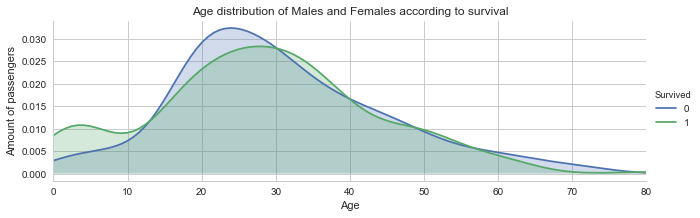

In [54]:
fig = sns.FacetGrid(titanic_all_age_cleaned, hue="Survived",aspect=3)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_all_age_cleaned['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()
sns.plt.title('Age distribution of Males and Females according to survival')
plt.ylabel("Amount of passengers")
plt.xlabel("Age")


The graph above shows that the age range with the highest survival chances is from 25 to 30 years old. Controversely, the age range with the lowest chances of survival is from 20 to 25 years old. The amount of suvivors and dead people have similar results according to age, except for two gaps from 0 to 10 years old and from 15 to 25 years old, where the amount of survivors is higher. This result suggest that children were priorized for being rescued.

# Conclusion

To conclude, the highest chances of survival was for people from the first class, then middle class and finally lower class, regardless of gender. In each class, females were prioritized.

Without considering the class of passengers, 82.57% of men, 22.48% of women and 40.96% of children died, which confirms the policy of "women and children first" on the Titanic. Therefore, men were the least rescued. A lower pourcentage of women died compared to children, which means that the survival rate was higher as a woman.

And finally, age was a determinant factor for survival, since more children survived than died, which is not the case for the age range of 30 to 80 years old, where the amount of passengers that died and survived is quite similar. 

This projects encountered several limitations. The population of 2'224 passengers was not analyzed, but only a sample of 891 people and there is no information about the selection of the sample. There could have been some sort of intentional or unintentional bias in how the sample was selected. Further questions could be explored for a deeper analysis, such as whether the fact of travelling alone or with a family would have had an impact on survival chances.